## Dataset #2 Traffuc Lights

In [43]:
import pandas as pd
import geopandas

In [35]:
#import Traffic Lights dataset
TrafficLights = pd.read_csv('TrafficLights.csv')
counts = TrafficLights['neighborhood'].value_counts()

counts.to_frame()
counts= counts.reset_index()
counts

,index,neighborhood
0,South Side Flats,3672
1,Bloomfield,3627
2,Central Business District,3491
3,Shadyside,3370
4,Squirrel Hill South,3281
...,...,...
86,Ridgemont,62
87,Chartiers City,44
88,Glen Hazel,38
89,Arlington Heights,21


In [44]:
hood = geopandas.read_file("https://data.wprdc.org/dataset/e672f13d-71c4-4a66-8f38-710e75ed80a4/resource/c5a93a8e-03d7-4eb3-91a8-c6b7db0fa261/download/neighborhoods.zip")
# do the merge
trafficlights_map = hood.merge(counts, how='left', left_on='hood', right_on='index')

In [45]:
trafficlights_map['proportion']= trafficlights_map['neighborhood']/ trafficlights_map['sqmiles']
trafficlights_map

,OBJECTID,fid_blockg,statefp10,countyfp10,tractce10,blkgrpce10,geoid10,namelsad10,mtfcc10,funcstat10,...,last_edi_1,temp,pghdb_sde_,GlobalID,Shape__Are,Shape__Len,geometry,index,neighborhood,proportion
0,1,233,42,003,140500,3,420031405003,Block Group 3,G5030,S,...,2020-08-14,None,7968760.0,a642a6b6-a2a9-48d5-acf2-3e2ce87d4bc0,8.417067e+06,14181.728584,"POLYGON ((-79.90531 40.45549, -79.90488 40.455...",Point Breeze North,608,2013.773882
1,2,203,42,003,140100,3,420031401003,Block Group 3,G5030,S,...,2020-08-14,None,34078712.0,20d4605b-258e-441a-a57e-a28fdabb6d30,3.410837e+07,30326.819418,"POLYGON ((-79.92063 40.44423, -79.92052 40.443...",Squirrel Hill North,1895,1548.950932
2,3,86,42,003,101700,2,420031017002,Block Group 2,G5030,S,...,2020-08-14,None,12751163.0,bf4065e7-c29c-48bd-b529-e7fd99077238,1.275115e+07,14577.426328,"POLYGON ((-79.93546 40.47257, -79.93530 40.472...",Garfield,848,1854.019693
3,4,214,42,003,050900,1,420030509001,Block Group 1,G5030,S,...,2020-08-14,None,4997335.5,fed3fb32-0cd3-4556-aa41-17ee03b4fe41,4.897519e+06,13941.514356,"POLYGON ((-79.96601 40.45520, -79.96595 40.454...",Bedford Dwellings,129,734.313443
4,5,173,42,003,300100,5,420033001005,Block Group 5,G5030,S,...,2020-08-14,None,8411048.0,8669d2f0-b886-4519-99d0-bb1015b592b0,8.353046e+06,12021.860516,"POLYGON ((-79.98819 40.41852, -79.98824 40.418...",Knoxville,750,2503.131835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86,215,42,003,141000,1,420031410001,Block Group 1,G5030,S,...,2020-08-14,None,5362860.0,93ce438e-e3ec-410d-a7fd-619646e25dc3,5.470266e+06,15761.679800,"POLYGON ((-79.89711 40.42762, -79.89663 40.427...",Regent Square,308,1569.676300
86,87,211,42,003,051100,1,420030511001,Block Group 1,G5030,S,...,2020-08-14,None,9529806.0,2858633a-175e-459b-a4c9-9aac92bfe033,9.050536e+06,17830.507786,"POLYGON ((-79.95848 40.44846, -79.95872 40.448...",Terrace Village,306,942.571868
87,88,153,42,003,562600,2,420035626002,Block Group 2,G5030,S,...,2020-08-14,None,16904768.0,fbc3ab11-0429-476e-80fd-700f969b204a,1.689127e+07,21714.648283,"POLYGON ((-80.03619 40.45073, -80.03496 40.449...",Elliott,547,902.803573
88,89,16,42,003,170200,1,420031702001,Block Group 1,G5030,S,...,2020-08-14,None,26083320.0,39308990-70d5-4da6-b2a0-a5510f18e9b9,2.576841e+07,34700.371969,"POLYGON ((-79.97726 40.43274, -79.97725 40.432...",South Side Flats,3672,3972.664348


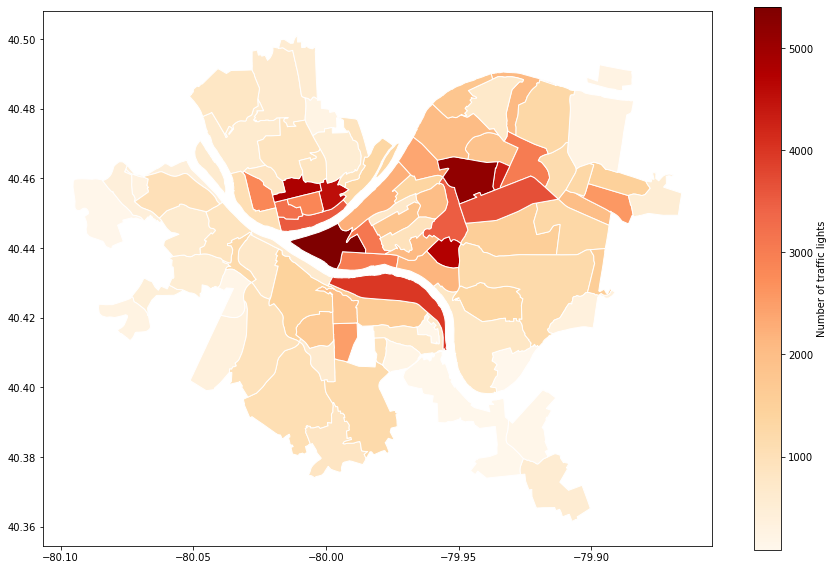

In [48]:
trafficlights_map.plot(column='proportion', # set the data to be used for coloring
               cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of traffic lights"}, # label the legend
               figsize=(15, 10)         # set the size
               )

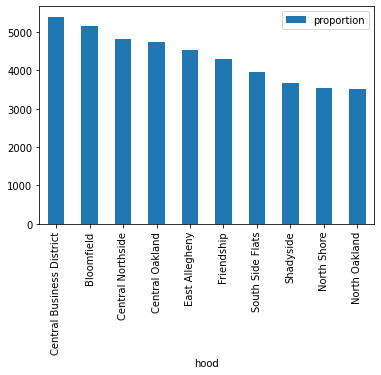

In [56]:
trafficlights_map= trafficlights_map[['hood', 'proportion']]


trafficlights_map = trafficlights_map.sort_values(by='proportion',ascending=False)
trafficlights_map.head(10).plot(kind='bar', x='hood')